In [461]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats


In [462]:
data_df = pd.read_csv('order_detail.csv')
data_df.head()

,Row ID,Order ID,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost
0,1,MX-2014-143658,OFF-LA-10002782,13.08,3,0.0,4.56,1.033
1,2,MX-2012-155047,FUR-FU-10004015,252.16,8,0.0,90.72,13.449
2,3,MX-2012-155047,FUR-BO-10002352,193.28,2,0.0,54.08,9.627
3,4,MX-2012-155047,OFF-BI-10004428,35.44,4,0.0,4.96,1.371
4,5,MX-2012-155047,OFF-AR-10004594,71.60,2,0.0,11.44,3.787


In [463]:
data_df.describe()

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
count,49670.000000,49670.000000,49670.000000,49670.000000,49670.000000,49670.000000
mean,25763.380974,243.840355,3.470787,0.143070,28.392264,26.041125
std,14838.084164,485.963091,2.274854,0.212046,172.399520,56.870281
min,1.000000,0.444000,1.000000,0.000000,-6599.980000,0.002000
25%,12749.250000,30.384000,2.000000,0.000000,0.000000,2.580000
50%,26073.500000,83.970000,3.000000,0.000000,9.154000,7.660000
75%,38522.750000,247.830000,5.000000,0.200000,36.266400,23.969000
max,51290.000000,22638.500000,14.000000,0.850000,8399.980000,933.570000


In [518]:
data_df['Price'] = data_df['Sales'] / data_df['Quantity']
data_df['Profit for single'] = data_df['Profit'] / data_df['Quantity']
data_df

,Row ID,Order ID,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost,Price,Profit for single
0,1,MX-2014-143658,OFF-LA-10002782,13.08,3,0.0,4.56,1.033,4.36,1.52
1,2,MX-2012-155047,FUR-FU-10004015,252.16,8,0.0,90.72,13.449,31.52,11.34
2,3,MX-2012-155047,FUR-BO-10002352,193.28,2,0.0,54.08,9.627,96.64,27.04
3,4,MX-2012-155047,OFF-BI-10004428,35.44,4,0.0,4.96,1.371,8.86,1.24
4,5,MX-2012-155047,OFF-AR-10004594,71.60,2,0.0,11.44,3.787,35.80,5.72
...,...,...,...,...,...,...,...,...,...,...
49665,51286,HU-2012-7730,OFF-AVE-10004570,11.07,1,0.0,3.42,1.980,11.07,3.42
49666,51287,HU-2012-7730,TEC-LOG-10004419,61.44,2,0.0,18.42,13.020,30.72,9.21
49667,51288,HU-2012-7730,OFF-BOS-10002705,80.52,4,0.0,20.88,8.780,20.13,5.22
49668,51289,HU-2012-7730,OFF-ENE-10004132,130.44,4,0.0,33.84,18.970,32.61,8.46


In [519]:
df_more_features = data_df.drop(['Row ID', 'Order ID', 'Profit for single'], axis=1)
df_more_features

,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost,Price
0,OFF-LA-10002782,13.08,3,0.0,4.56,1.033,4.36
1,FUR-FU-10004015,252.16,8,0.0,90.72,13.449,31.52
2,FUR-BO-10002352,193.28,2,0.0,54.08,9.627,96.64
3,OFF-BI-10004428,35.44,4,0.0,4.96,1.371,8.86
4,OFF-AR-10004594,71.60,2,0.0,11.44,3.787,35.80
...,...,...,...,...,...,...,...
49665,OFF-AVE-10004570,11.07,1,0.0,3.42,1.980,11.07
49666,TEC-LOG-10004419,61.44,2,0.0,18.42,13.020,30.72
49667,OFF-BOS-10002705,80.52,4,0.0,20.88,8.780,20.13
49668,OFF-ENE-10004132,130.44,4,0.0,33.84,18.970,32.61


In [520]:
df = df_more_features


from sklearn.preprocessing import LabelEncoder
columns_to_encode = [ 'Product ID']


for column in columns_to_encode:
    encoded_values = LabelEncoder().fit_transform(df[column])
    df[column] = encoded_values


Text(0.5, 1.0, 'correlation heatmap')

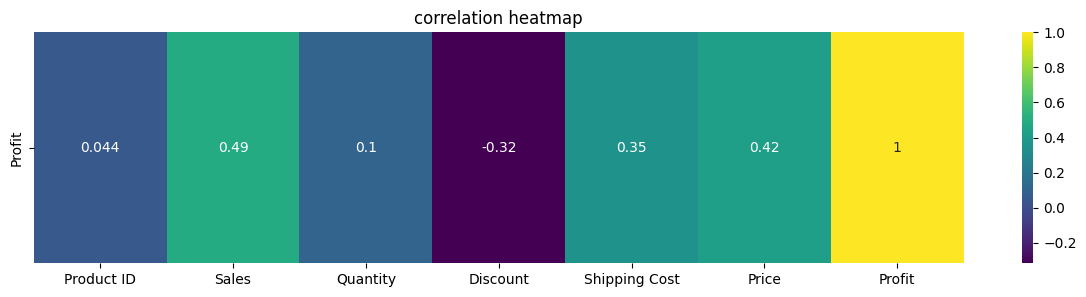

In [588]:

import matplotlib.pyplot as plt
import seaborn as sns
df = df.reindex(columns=[col for col in df.columns if col != 'Profit'] + ['Profit'])
corr_matrix = df.corr()

fig1, ax1 = plt.subplots(figsize=(15, 3))
sns.heatmap(corr_matrix.iloc[6:7], cmap='viridis', annot=True,ax=ax1)
ax1.set_title('correlation heatmap')

,Product ID,Sales,Quantity,Discount,Shipping Cost,Price,Profit
Profit,0.043911,0.486865,0.104731,-0.316201,0.351848,0.422118,1.0


In [538]:

X = df.drop('Profit', axis=1)
y = df['Profit']

In [523]:
y

0         4.56
1        90.72
2        54.08
3         4.96
4        11.44
         ...  
49665     3.42
49666    18.42
49667    20.88
49668    33.84
49669    12.96
Name: Profit, Length: 49670, dtype: float64

In [552]:
z_scores = np.abs(stats.zscore(X))

# Define a threshold to identify outliers
threshold = 3

# Remove outliers using the Z-score method
X_new = X[(z_scores < threshold).all(axis=1)]
y_new = y[X_new.index]

# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.11, random_state=42)

In [553]:
X_train

,Product ID,Sales,Quantity,Discount,Shipping Cost,Price
36422,6131,10.560,2,0.0,1.200,5.280
3432,4978,11.120,1,0.0,0.764,11.120
7766,9746,130.620,3,0.0,11.243,43.540
26093,3869,31.950,2,0.5,2.610,15.975
7112,5053,8.472,2,0.4,0.912,4.236
...,...,...,...,...,...,...
17631,2541,543.090,2,0.5,45.560,271.545
37834,2011,550.431,3,0.3,34.070,183.477
13975,6878,16.560,1,0.0,1.320,16.560
16544,3187,56.850,5,0.0,0.770,11.370


In [554]:
#Perform feature scaling on the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [571]:
# Define a list of models to evaluate
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor()
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)

    print('\n....................\n')
    print(f"Model: {type(model).__name__}")
    print('....')
    # Make predictions on the train set
    y_train_pred = model.predict(X_train)

    # Evaluate the model on the train set using MSE and R2 score
    train_r2 = r2_score(y_train, y_train_pred)
    print("Train R2 score:", train_r2)

    print('....')
    y_val_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_val_pred)
    print(f"Validation R2 score: {r2}")
    print('....')
    y_test_pred = model.predict(X_test)

    # Evaluate the model on the test set using mean squared error
    test_r2 = r2_score(y_test, y_test_pred)
    print("Test R2 score:", test_r2)

# Select the best model based on R2 score
best_model = models[np.argmax([r2_score(y_val, model.predict(X_val)) for model in models])]

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_test_pred)
print('\n....................\n')
print(f"Best Model: {type(best_model).__name__}")
print(f"Test R2 score: {r2}")


....................

Model: LinearRegression
....
Train R2 score: 0.25758109336781077
....
Validation R2 score: 0.2818694663505751
....
Test R2 score: 0.25592854898699324

....................

Model: DecisionTreeRegressor
....
Train R2 score: 1.0
....
Validation R2 score: 0.46675655800454674
....
Test R2 score: 0.4778087162412523

....................

Model: RandomForestRegressor
....
Train R2 score: 0.9580839901536278
....
Validation R2 score: 0.7308809147299372
....
Test R2 score: 0.7056937761291304

....................

Model: KNeighborsRegressor
....
Train R2 score: 0.7492842152371949
....
Validation R2 score: 0.652399682630877
....
Test R2 score: 0.644009251378753

....................

Best Model: RandomForestRegressor
Test R2 score: 0.7056937761291304


In [562]:
# Create a list of hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

best_model = None
best_val_r2 = None

# Iterate over each combination of hyperparameters
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        
        # Create the Random Forest Regressor with current hyperparameters
        rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        
        # Train the model on the training set
        rf.fit(X_train, y_train)
        
        # Evaluate the model on the validation set
        y_pred_val = rf.predict(X_val)
        val_r2 = r2_score(y_val, y_pred_val)
        
        # Check if the current model has higher validation R-squared score
        if val_r2 > best_val_r2:
            best_model = rf
            best_val_r2 = val_r2

# Evaluate the best model on the test set

y_pred_train = best_model.predict(X_train)
train_r2 = r2_score(y_train, y_pred_train)

y_pred_test = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred_test)

# Print the results
print("Best Hyperparameters:", best_model.get_params())
print("Train R-squared Score:", train_r2)
print("Validation R-squared Score:", best_val_r2)
print("Test R-squared Score:", test_r2)

Best Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Validation R-squared Score: 0.7342251861471143
Test R-squared Score: 0.715245281914491


## Hear we're going to experiment with polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [580]:
from sklearn.preprocessing import PolynomialFeatures

degree =3  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.transform(X_val)
X_test_poly = poly_features.transform(X_test)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the polynomial features
model.fit(X_train_poly, y_train)

# Evaluate the model on the Train set
y_pred_train = model.predict(X_train_poly)
train_r2 = r2_score(y_train, y_pred_train)


# Evaluate the model on the validation set
y_pred_val = model.predict(X_val_poly)
val_r2 = r2_score(y_val, y_pred_val)

# Evaluate the model on the test set
y_pred_test = model.predict(X_test_poly)
test_r2 = r2_score(y_test, y_pred_test)

# Print the results
print("Polynomial Degree:", degree)
print("Train R-squared Score:", train_r2)
print("Validation R-squared Score:", val_r2)
print("Test R-squared Score:", test_r2)

Polynomial Degree: 3
Train R-squared Score: 0.7072800377438486
Validation R-squared Score: 0.7328152611100267
Test R-squared Score: 0.7153571026790847
